In [2]:
import pandas as pd
import os
import sys
import glob
import json
from os.path import expanduser
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
from agavepy.agave import Agave, AgaveError
from agavepy.files.download import files_download
%matplotlib inline




%load_ext autoreload
%reload_ext autoreload
%autoreload 2


from pysd2cat.analysis import live_dead_analysis as lda
from pysd2cat.analysis.Names import Names
from pysd2cat.analysis import biofab_live_dead_analysis as blda
from pysd2cat.plot import biofab_live_dead_plots as bldp

from pysd2cat.data import pipeline

out_dir='.' # test harness output

experiments = [
    'experiment.uw_biofab.34601',
    'experiment.uw_biofab.34600',
    'r1dd37mcxv5pf4'
]

run_strain = {
    'experiment.uw_biofab.34600' : 'CEN.PK2 - MAT A',
    'experiment.uw_biofab.34601' : 'S288c_a',
    'r1dd37mcxv5pf4' : 'S288c_a'
}

experiment_lab = {
    'experiment.uw_biofab.34600' : 'BioFab',
    'experiment.uw_biofab.34601' : 'BioFab',
    'r1dd37mcxv5pf4' : 'TX'
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
#experiment_df

/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11,13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


agave_path         agave_system challenge_problem               experiment_id                experiment_reference                                                         experiment_reference_url file_type                                                                                     filename                                                                                     hpc_path                                                                      jupyter_path kill_method  kill_volume kill_volume_unit        lab  level measurement_type                                           sample_id            stain                    strain         strain_lab_id                                                    strain_sbh_uri  temperature      FSC-A      SSC-A     FL1-A    FL2-A    FL3-A     FL4-A      FSC-H      SSC-H     FL1-H    FL2-H     FL3-H     FL4-H  Width    Time    index  live
0        /uploads/biofab/201907/34600/op_211578/37759-A01.fcs  data-sd2e-community  YEAST_STATES      experiment.uw_biofab.34600  YeastSTATES-LiveDeadClassification  https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ  FCS       data/biofab/experiment.uw_biofab.34600//uploads/biofab/201907/34600/op_211578/37759-A01.fcs  /work/projects/SD2E-Community/prod/data/uploads/biofab/201907/34600/op_211578/37759-A01.fcs  /home/jupyter/sd2e-community/uploads/biofab/201907/34600/op_211578/37759-A01.fcs  Ethanol     980.0        microliter       uw_biofab  0      FLOW             sample.uw_biofab.395880.experiment.uw_biofab.34600  SYTOX Red Stain  S288c_a                   name.uw_biofab.30200  https://hub.sd2e.org/user/sd2e/design/S288c_a/1                   30.0         7336606.0  6122010.0  228882.0  69471.0  84146.0  13536.0   3985928.0  4896748.0  92434.0   28046.0  33939.0   5869.0    187.0  154.0   0        0   
1        /uploads/biofab/201907/34600/op_211578/37759-A01.fcs  data-sd2e-community  YEAST_STATES      experiment.uw_biofab.34600  YeastSTATES-LiveDeadClassification  https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ  FCS       data/biofab/experiment.uw_biofab.34600//uploads/biofab/201907/34600/op_211578/37759-A01.fcs  /work/projects/SD2E-Community/prod/data/uploads/biofab/201907/34600/op_211578/37759-A01.fcs  /home/jupyter/sd2e-community/uploads/biofab/201907/34600/op_211578/37759-A01.fcs  Ethanol     980.0        microliter       uw_biofab  0      FLOW             sample.uw_biofab.395880.experiment.uw_biofab.34600  SYTOX Red Stain  S288c_a                   name.uw_biofab.30200  https://hub.sd2e.org/user/sd2e/design/S288c_a/1                   30.0         604924.0   929560.0   35805.0   11880.0  12201.0  1418.0    847513.0   1146045.0  27810.0   8743.0   8843.0    2424.0    45.0   155.0   1        0   
2        /uploads/biofab/201907/34600/op_211578/37759-A01.fcs  data-sd2e-community  YEAST_STATES      experiment.uw_biofab.34600  YeastSTATES-LiveDeadClassification  https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ  FCS       data/biofab/experiment.uw_biofab.34600//uploads/biofab/201907/34600/op_211578/37759-A01.fcs  /work/projects/SD2E-Community/prod/data/uploads/biofab/201907/34600/op_211578/37759-A01.fcs  /home/jupyter/sd2e-community/uploads/biofab/201907/34600/op_211578/37759-A01.fcs  Ethanol     980.0        microliter       uw_biofab  0      FLOW             sample.uw_biofab.395880.experiment.uw_biofab.34600  SYTOX Red Stain  S288c_a                   name.uw_biofab.30200  https://hub.sd2e.org/user/sd2e/design/S288c_a/1                   30.0         5352153.0  4124297.0  110151.0  39583.0  39754.0  7890.0    2818214.0  3572327.0  48146.0   17212.0  19618.0   4176.0    154.0  155.0   2        0   
3        /uploads/biofab/201907/34600/op_211578/37759-A01.fcs  data-sd2e-community  YEAST_STATES      experiment.uw_biofab.34600  YeastSTATES-LiveDeadClassification  https://docs.google.com/document/d/1ztX-c9e4vplz9lYlHlGOWzGdW5Veb_RleOowb-PQ2tQ  FCS       da

In [36]:
leader_board_df = blda.get_leader_board_df('.', expand_description=True)

No handles with labels found to put in legend.


['experiment.uw_biofab.34601' 'experiment.uw_biofab.34600'
 'r1dd37mcxv5pf4']


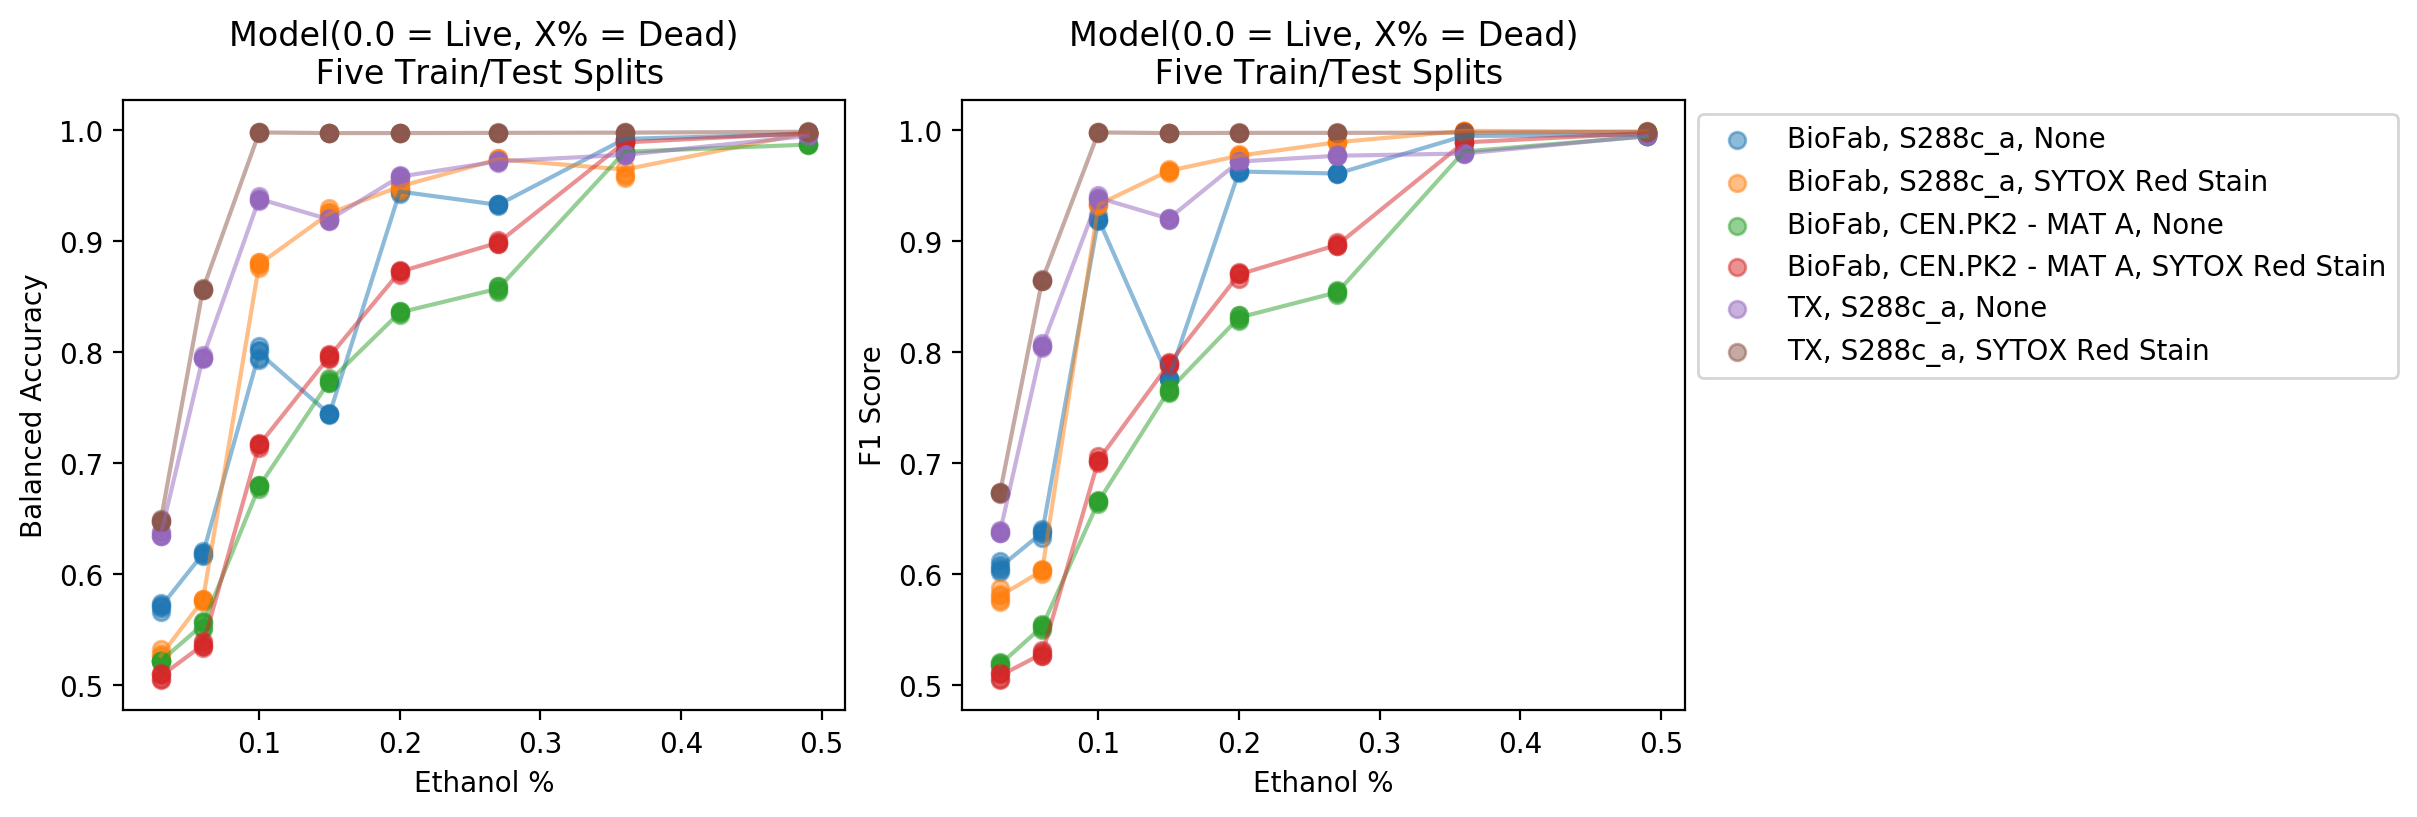

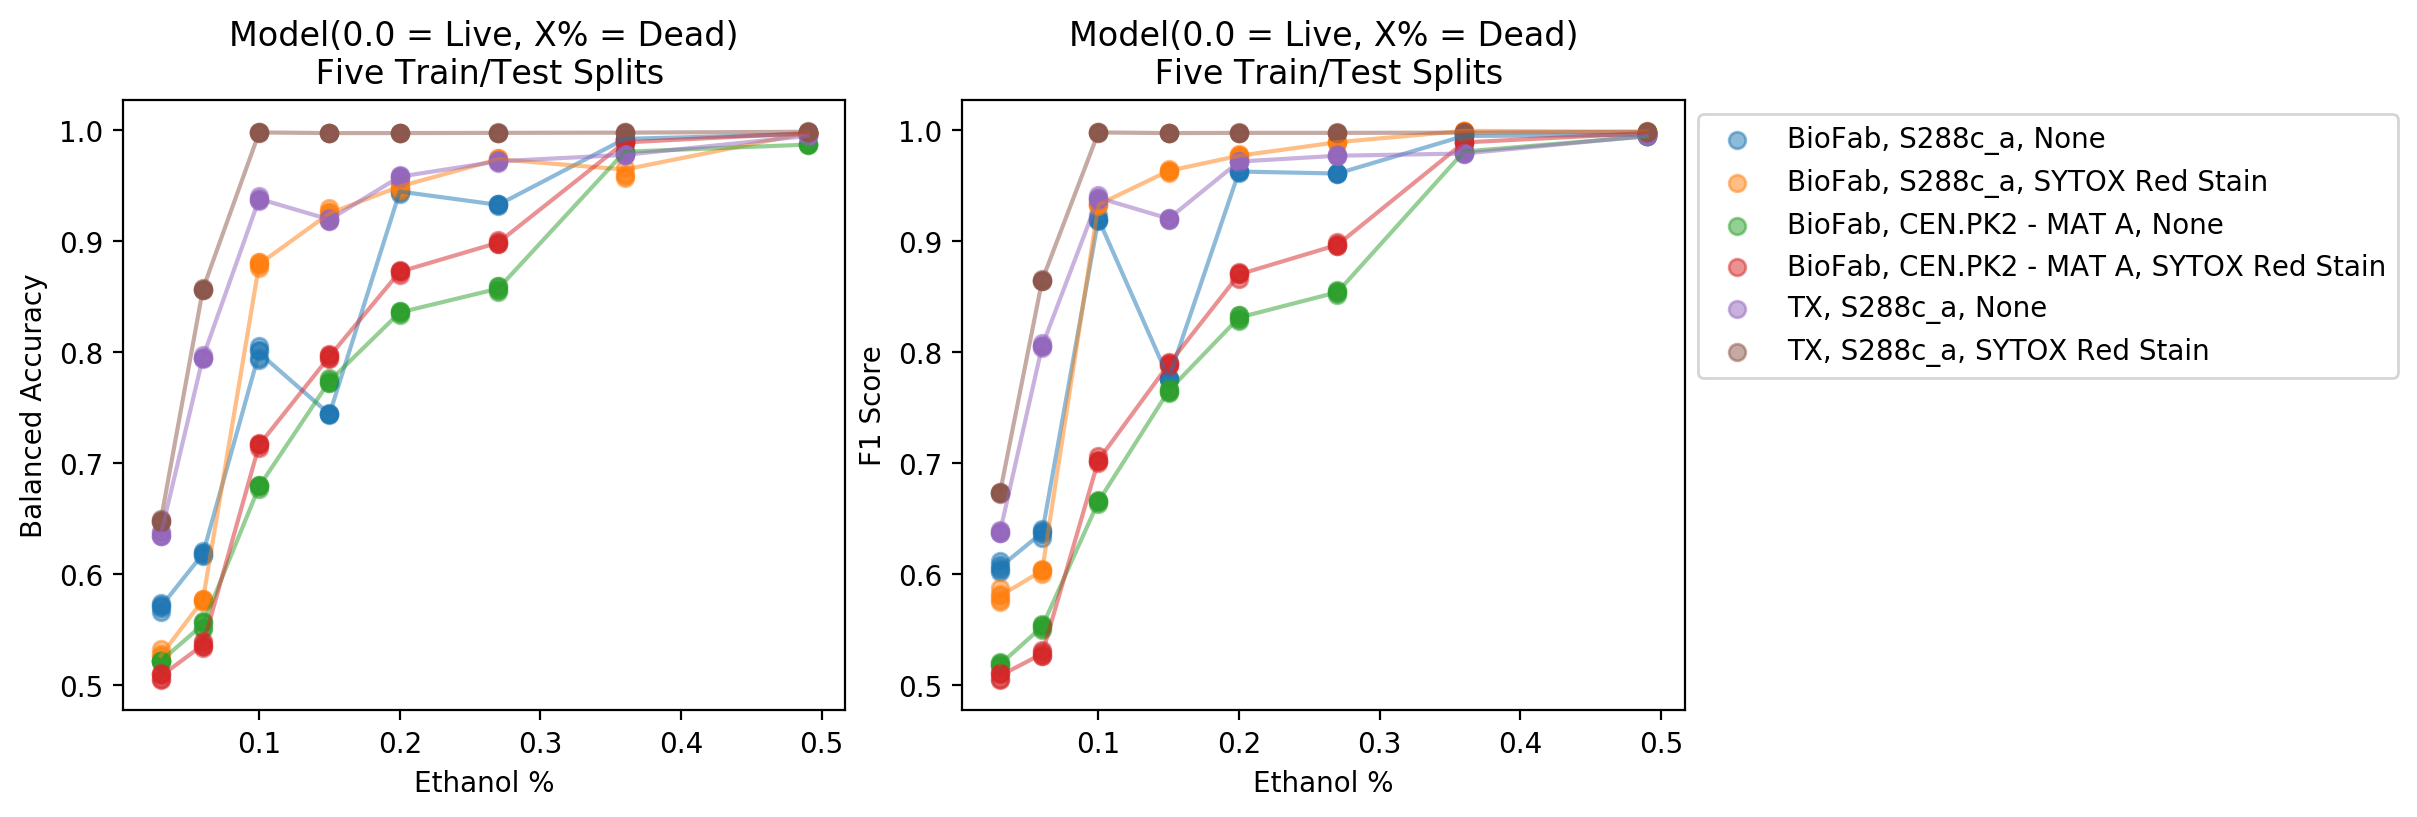

In [40]:
bldp.get_statistics_by_volume(leader_board_df, experiment_strain=run_strain, experiment_lab=experiment_lab)

(<Figure size 1600x800 with 2 Axes>, mean    0.037875
 std     0.025644
 dtype: float64)

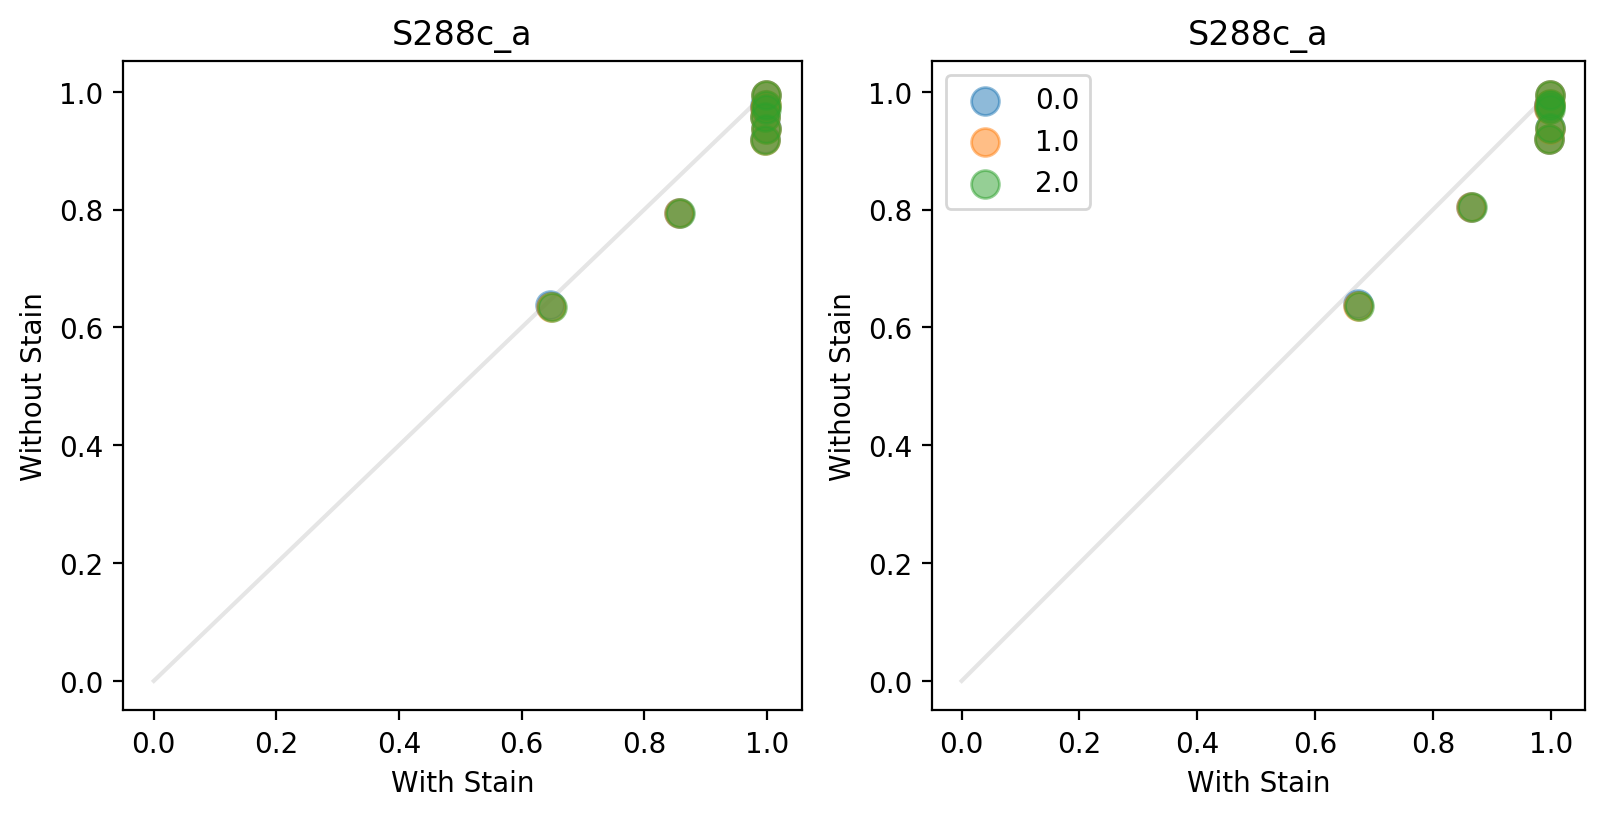

In [133]:
bldp.get_stain_scatter(leader_board_df, experiments[2], experiment_strain=run_strain)

Text(0.5, 0, 'Ethanol %')

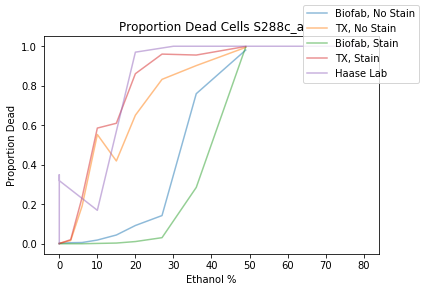

In [107]:
# For each sample, what proportion are dead?

robs_experiment = pd.read_csv('../resources/6-12_percent_dead.csv')

data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


data_dir1 = os.path.join('data/transcriptic')
all_data_file1 = os.path.join(data_dir1, 'data.csv')
experiment_df1 = pd.read_csv(all_data_file1, index_col=0)

dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live'].agg(lambda x: 1 - x.sum()/len(x)).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = dead_proportion.loc[dead_proportion.kill_volume != "None"]
dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'well', 'stain'])['live'].agg(lambda x: 1 - x.sum()/len(x)).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = dead_proportion1.loc[dead_proportion1.kill_volume != "None"]

#volumes=list(dead_proportion['kill_volume'].values)
#volumes.extend(robs_experiment['Ethanol vol (ul)'].values)
#volumes=list(set(volumes))
#volumes.sort()

#robs_experiment.merge(pd.DataFrame({"Ethanol vol (ul)" : volumes}), on='Ethanol vol (ul)', how='right').sort_values(by=['Ethanol vol (ul)'])
#dead_proportion.merge(pd.DataFrame({"kill_volume" : volumes}), on='kill_volume', how='right').sort_values(by=['kill_volume'])
#dead_proportion1.merge(pd.DataFrame({"kill_volume" : volumes}), on='kill_volume', how='right').sort_values(by=['kill_volume'])



#experiment_id = experiment_df.experiment_id.dropna().unique()[0]
experiment_id = experiment_df.strain.dropna().unique()[0]
#print(dead_proportion)
fig = plt.figure()
ax = plt.subplot(111)
percentages=[ 100*x for x in [0, .03, .06, .10, .15, .20, .27, .36, .49]]
ax.plot(percentages, dead_proportion.loc[dead_proportion.stain == "None"]['dead'], label="Biofab, No Stain", alpha=0.5)
ax.plot(percentages, dead_proportion1.loc[dead_proportion1.stain == "None"]['dead'], label="TX, No Stain", alpha=0.5)
ax.plot(percentages, dead_proportion.loc[dead_proportion.stain == "SYTOX Red Stain"]['dead'], label="Biofab, Stain", alpha=0.5)
ax.plot(percentages, dead_proportion1.loc[dead_proportion1.stain == "SYTOX Red Stain"]['dead'], label="TX, Stain", alpha=0.5)

ax.plot(100*robs_experiment["% Ethanol"], robs_experiment['% Dead'], label="Haase Lab", alpha=0.5)
#ax.bar()
#ax.set_xscale('log')
fig.legend()
plt.title("Proportion Dead Cells "  + experiment_id)
ax.set_ylabel("Proportion Dead")
ax.set_xlabel("Ethanol %")
#plt.xticks(range(0, len(volumes)), volumes)


In [112]:
robs_experiment

Treatment  % Dead  culture vol (ul)  Ethanol vol (ul)  % Ethanol
0   Control 1    0.00    1000              0                 0.0      
1   Control 2    0.35    1000              0                 0.0      
2   Control 3    0.32    1000              0                 0.0      
3   10% Ethanol  0.17    1000              110               0.1      
4   20% Ethanol  0.97    1000              250               0.2      
5   30% Ethanol  1.00    1000              420               0.3      
6   40% Ethanol  1.00    1000              680               0.4      
7   50% Ethanol  1.00    1000              1000              0.5      
8   60% Ethanol  1.00    1000              1500              0.6      
9   70% Ethanol  1.00    1000              2300              0.7      
10  80% Ethanol  1.00    1000              4000              0.8

['SYTOX Red Stain' nan]


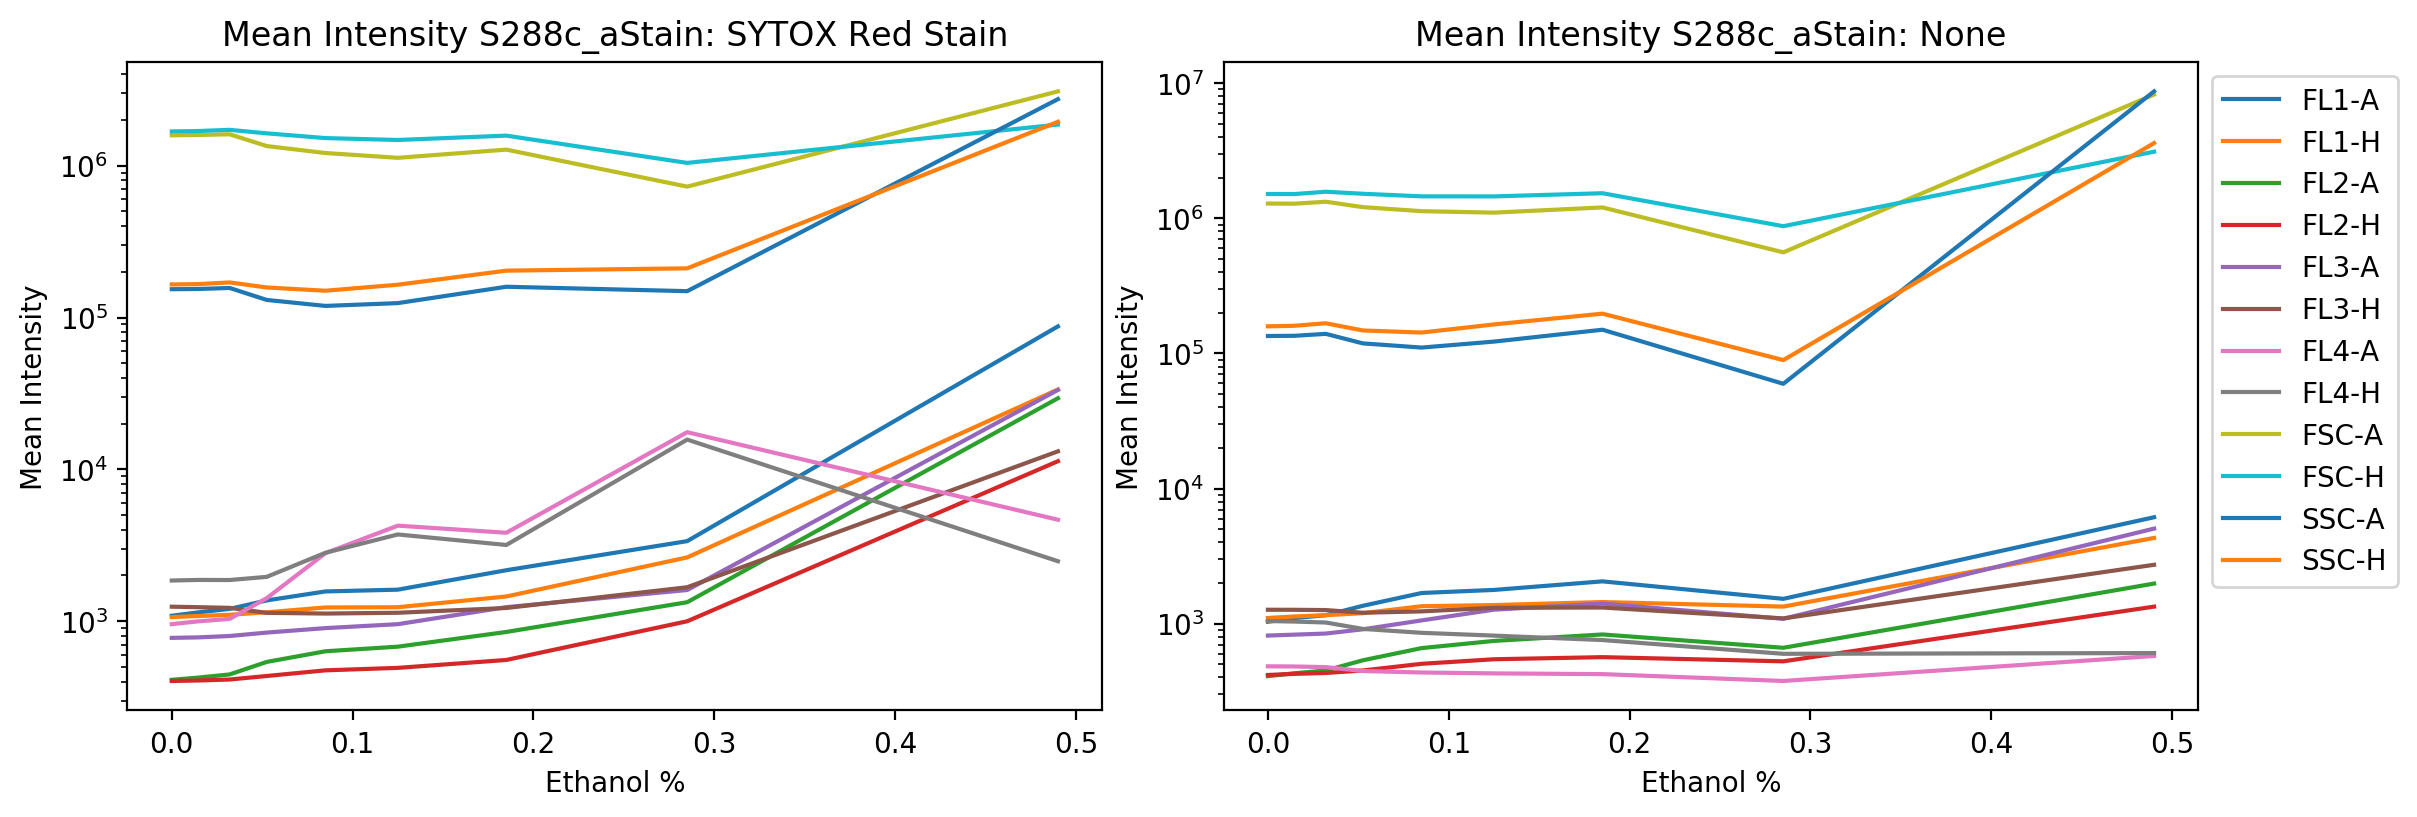

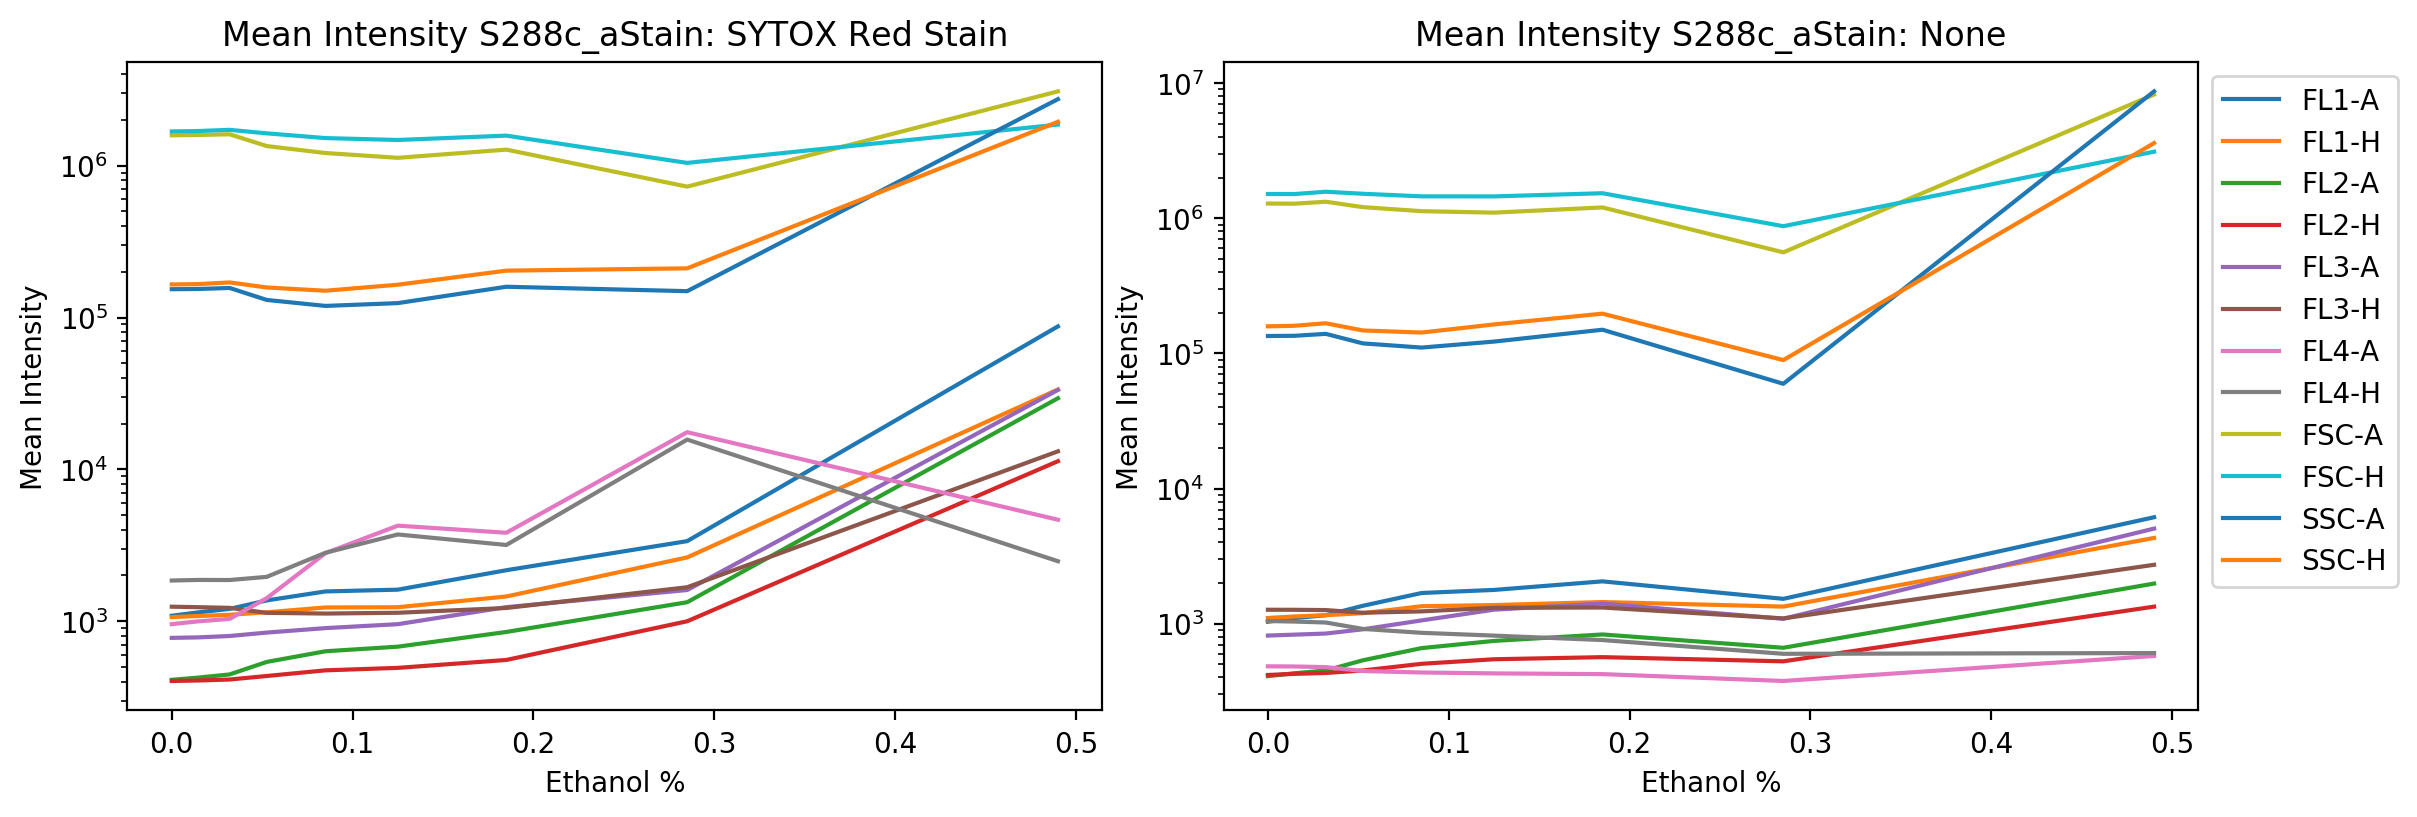

In [108]:
data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

bldp.get_channel_mean_titration(experiment_df)

['SYTOX Red Stain' nan]


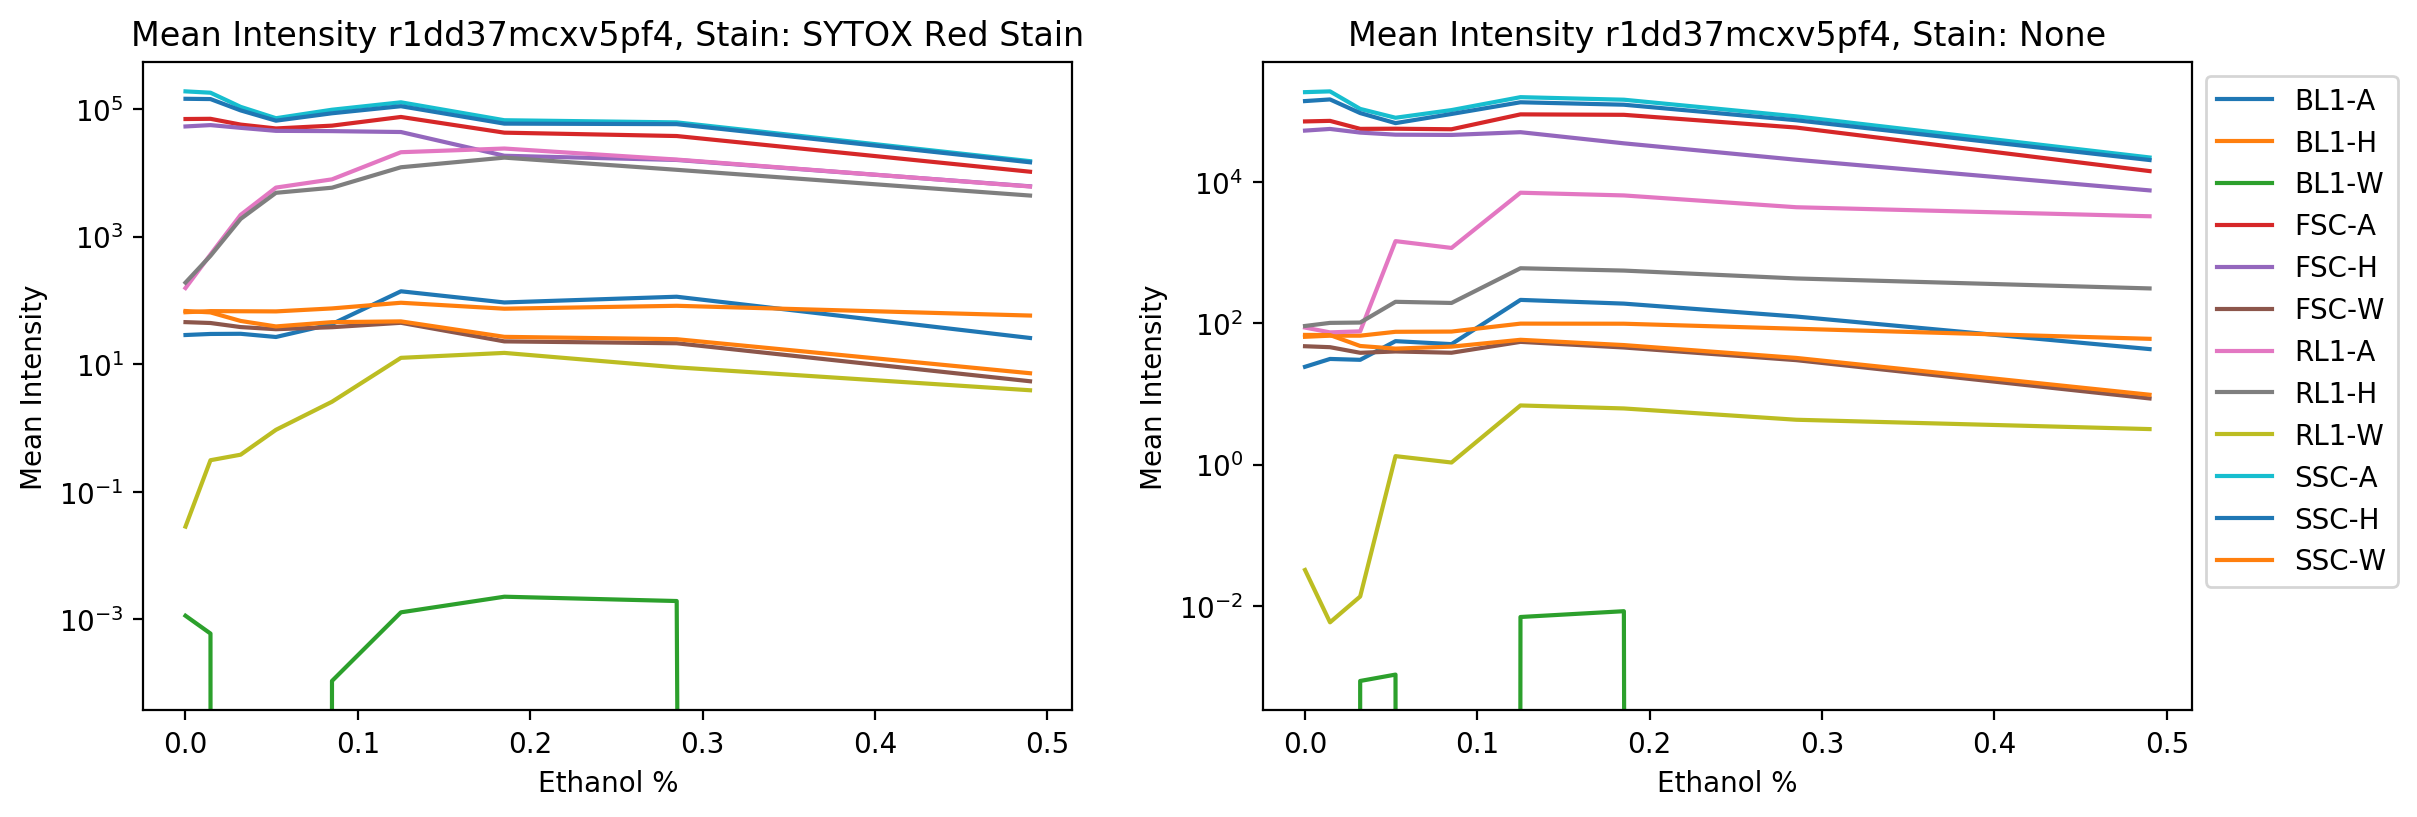

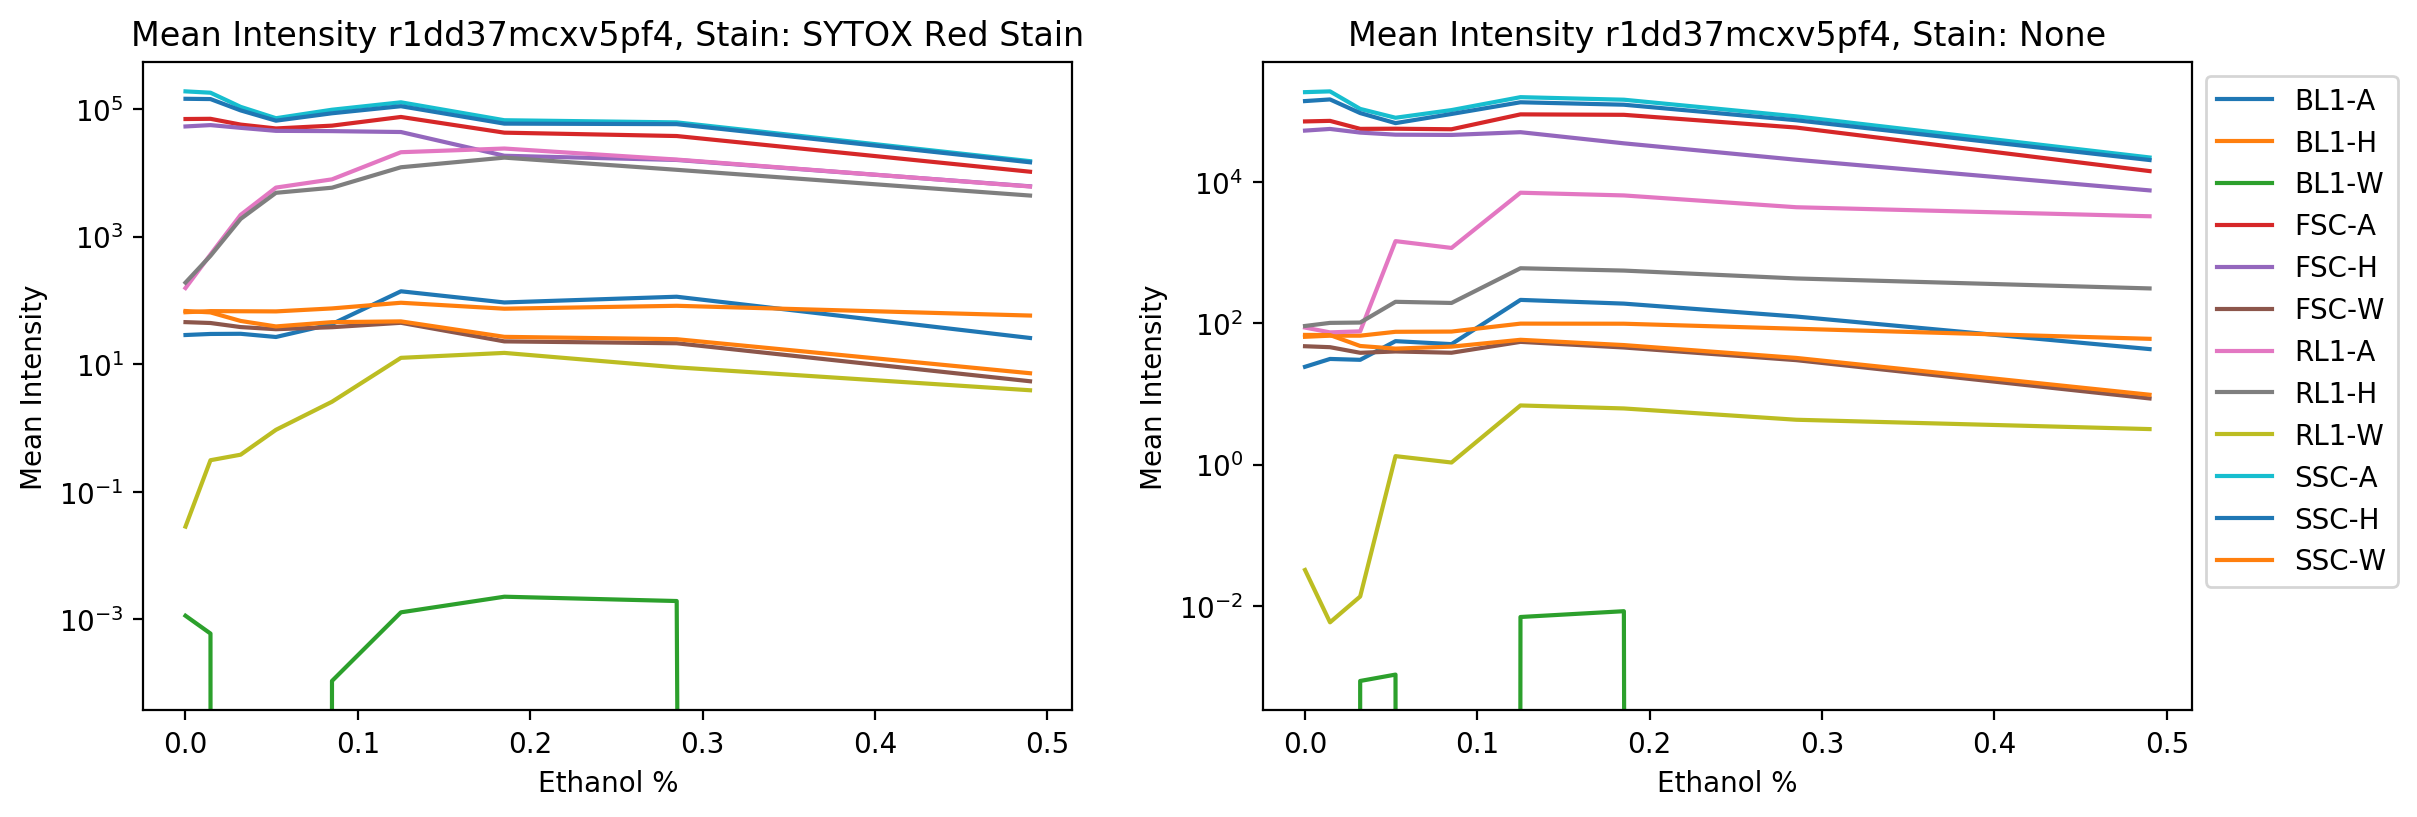

In [109]:
data_dir = os.path.join('data/transcriptic')
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

bldp.get_channel_mean_titration(experiment_df, 
                               channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W'])

In [128]:
data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

bldp.get_channel_histograms(experiment_df)

[autoreload of pysd2cat.plot.biofab_live_dead_plots failed: Traceback (most recent call last):
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen im

In [111]:
data_dir = os.path.join('data/transcriptic')
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

#bldp.get_channel_mean_titration(experiment_df)
bldp.get_channel_histograms(experiment_df, 
                               channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W'])

In [159]:
all=experiment_df.loc[experiment_df['kill_volume'] == 250.0]['FL1-A'].sum()
live=experiment_df.loc[(experiment_df['kill_volume'] == 250.0) & (experiment_df['live'] == 1)]['FL1-A'].sum()
ratio = live/all
print(all)
print(live)
print(ratio)
print(experiment_df.loc[(experiment_df['kill_volume'] == 250.0)]['live'].mean())

407045863.0
376115824.0
0.9240133807722792
0.953375
